In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
from google.colab import files
upload = files.upload()

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv


In [55]:
data = pd.read_csv("breast-cancer-wisconsin.csv",header=None)

In [56]:
data.head(-1)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3,1,1,1,2,1,2,1,2,2
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4


In [57]:
cols = ['Id', 'Clump Thickness', 'Uniformity Cell Size', 'Uniformity Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
data.columns = cols
data.head()

,Id,Clump Thickness,Uniformity Cell Size,Uniformity Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [58]:
data.drop("Id",axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity Cell Size         699 non-null    int64 
 2   Uniformity Cell Shape        699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [59]:
cols.remove("Id")

In [60]:
for i in cols:
  print(f"unique symbols in {i}: {data[i].unique()}")

unique symbols in Clump Thickness: [ 5  3  6  4  8  1  2  7 10  9]
unique symbols in Uniformity Cell Size: [ 1  4  8 10  2  3  7  5  6  9]
unique symbols in Uniformity Cell Shape: [ 1  4  8 10  2  3  5  6  7  9]
unique symbols in Marginal Adhesion: [ 1  5  3  8 10  4  6  2  9  7]
unique symbols in Single Epithelial Cell Size: [ 2  7  3  1  6  4  5  8 10  9]
unique symbols in Bare Nuclei: ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
unique symbols in Bland Chromatin: [ 3  9  1  2  4  5  7  8  6 10]
unique symbols in Normal Nucleoli: [ 1  2  7  4  5  3 10  6  9  8]
unique symbols in Mitoses: [ 1  5  4  2  3  7 10  8  6]
unique symbols in Class: [2 4]


In [61]:
data["Bare Nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [62]:
data.replace("?",np.nan,inplace=True)

In [63]:
data.isna().sum()

Clump Thickness                 0
Uniformity Cell Size            0
Uniformity Cell Shape           0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [64]:
data["Bare Nuclei"] = pd.to_numeric(data["Bare Nuclei"],downcast="integer")

In [65]:
mean_bare = data["Bare Nuclei"].mean()
data["Bare Nuclei"].fillna(mean_bare,inplace=True)

In [66]:
data.isna().sum()

Clump Thickness                0
Uniformity Cell Size           0
Uniformity Cell Shape          0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

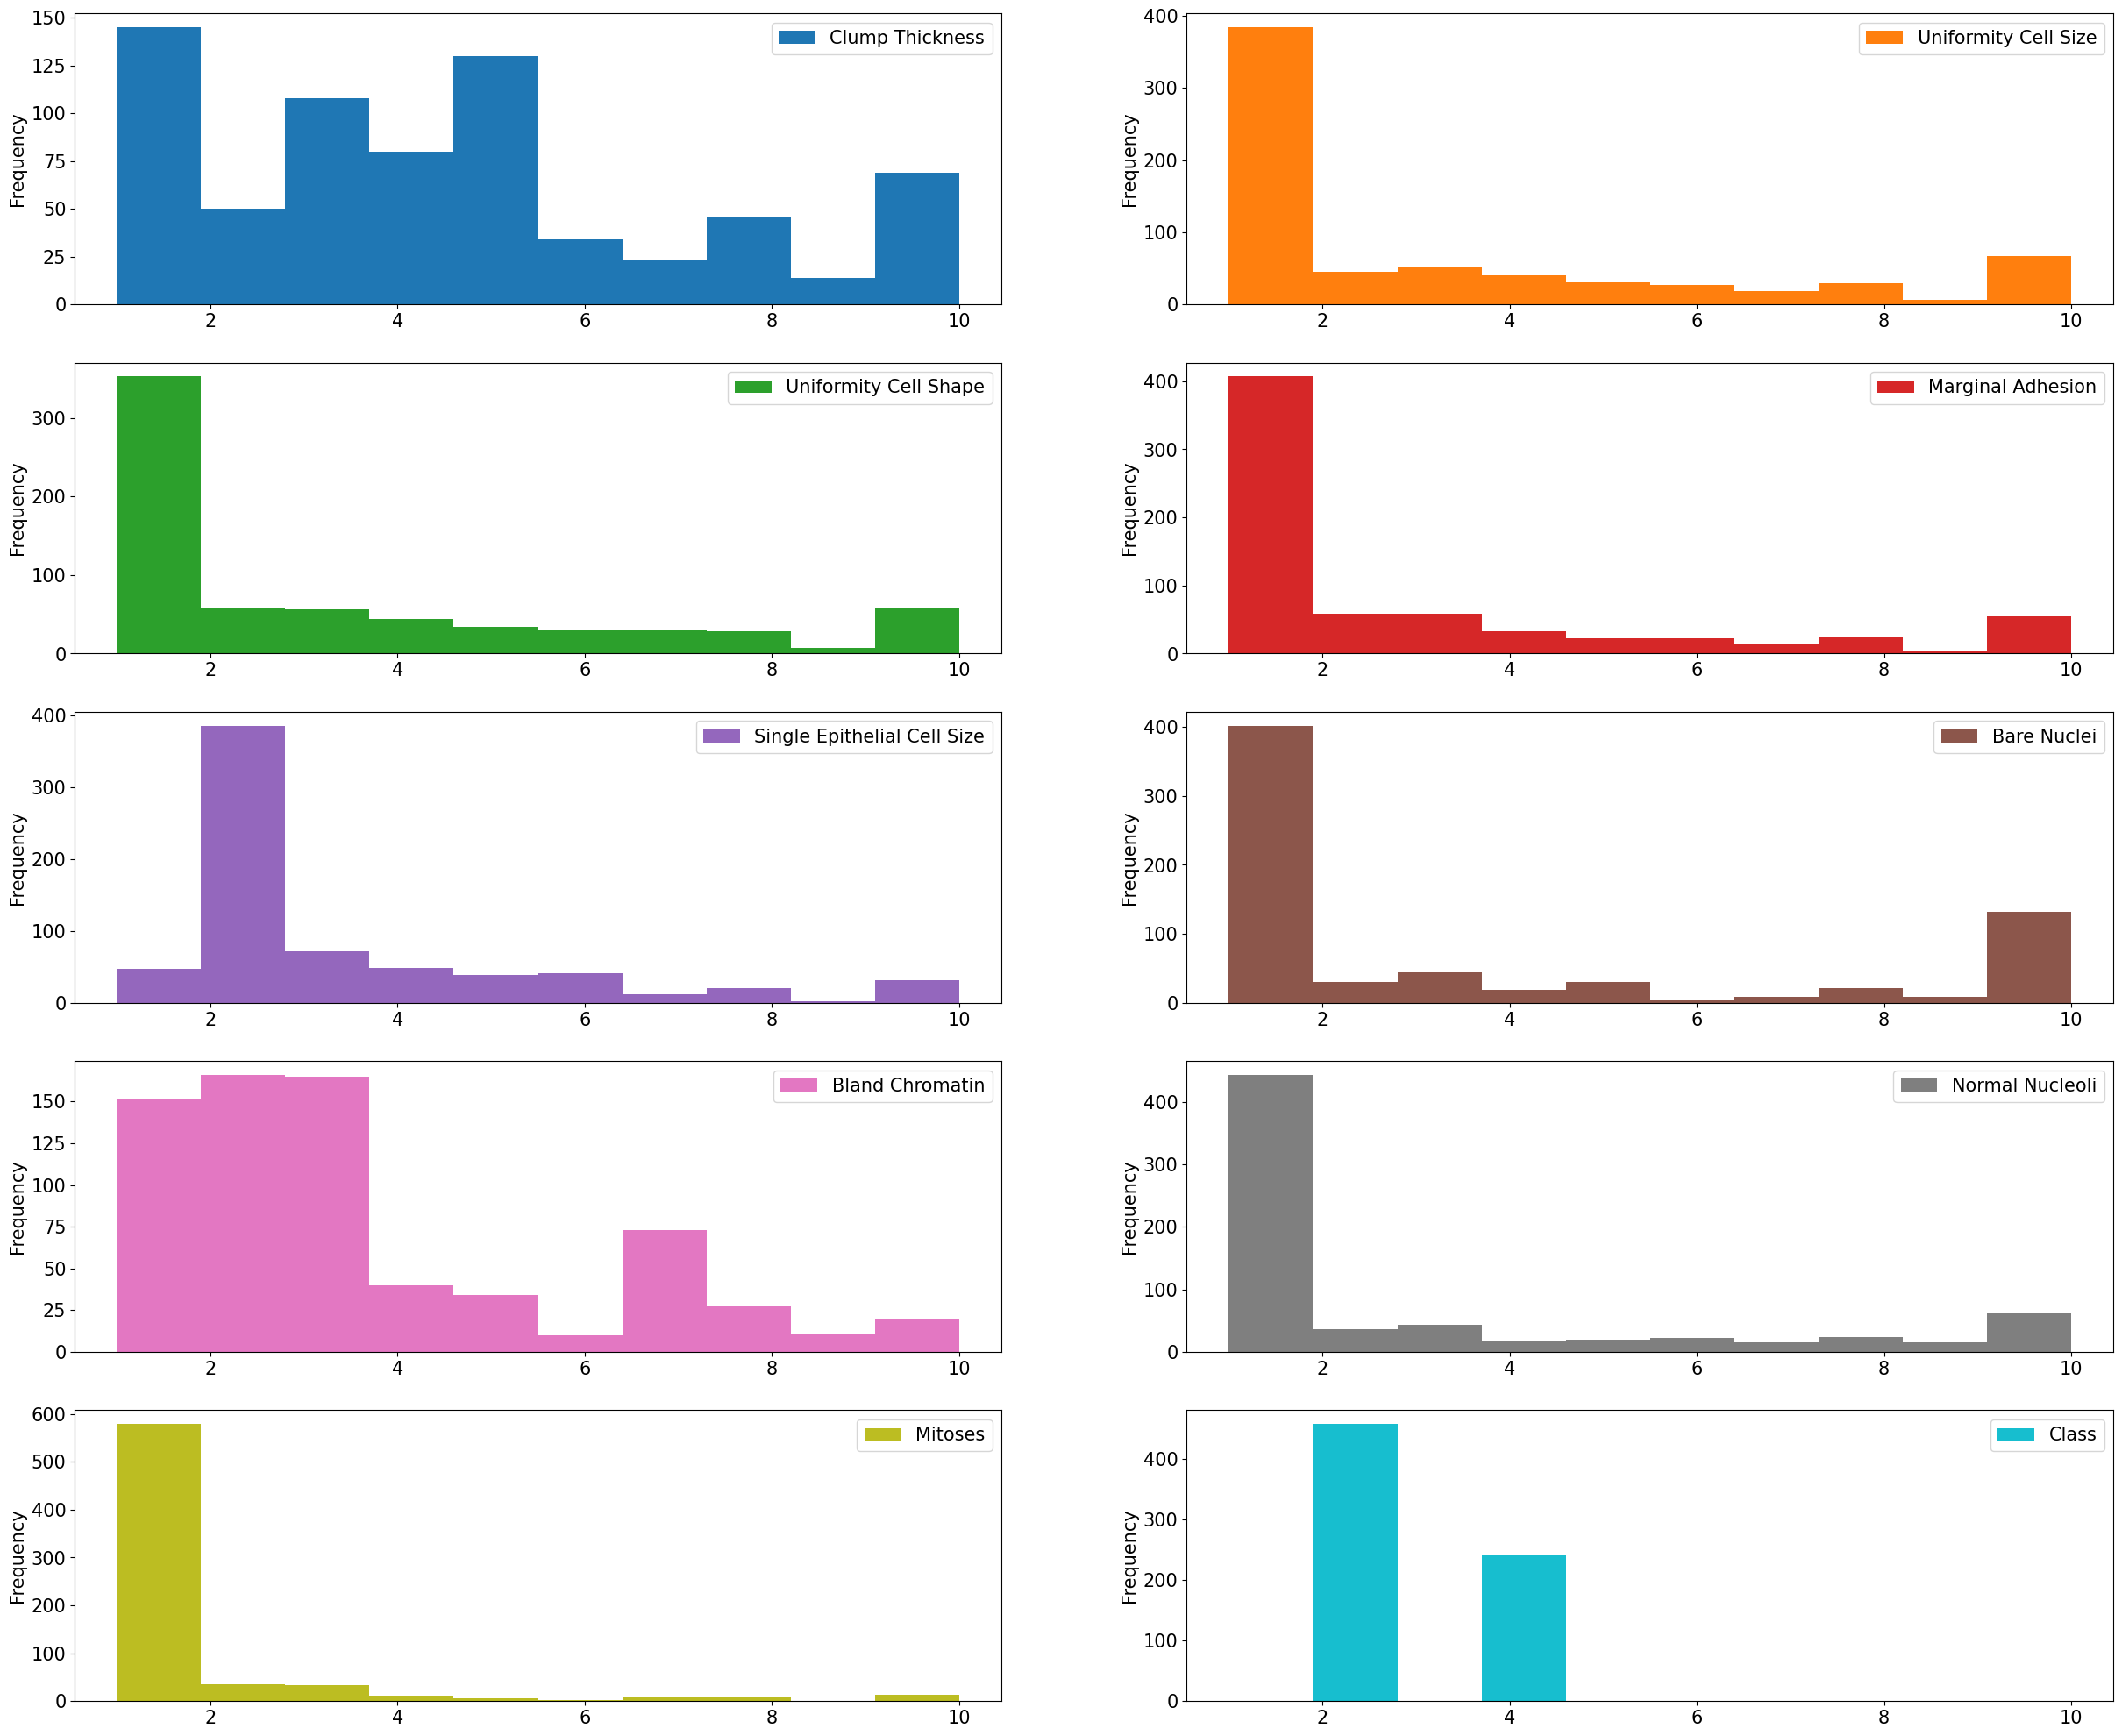

In [67]:
plt.rcParams.update({'figure.figsize':(30,25),'font.size':15})
data.plot(kind='hist',bins=10,subplots=True,layout=(5,2),sharex=False,sharey=False)
plt.show()

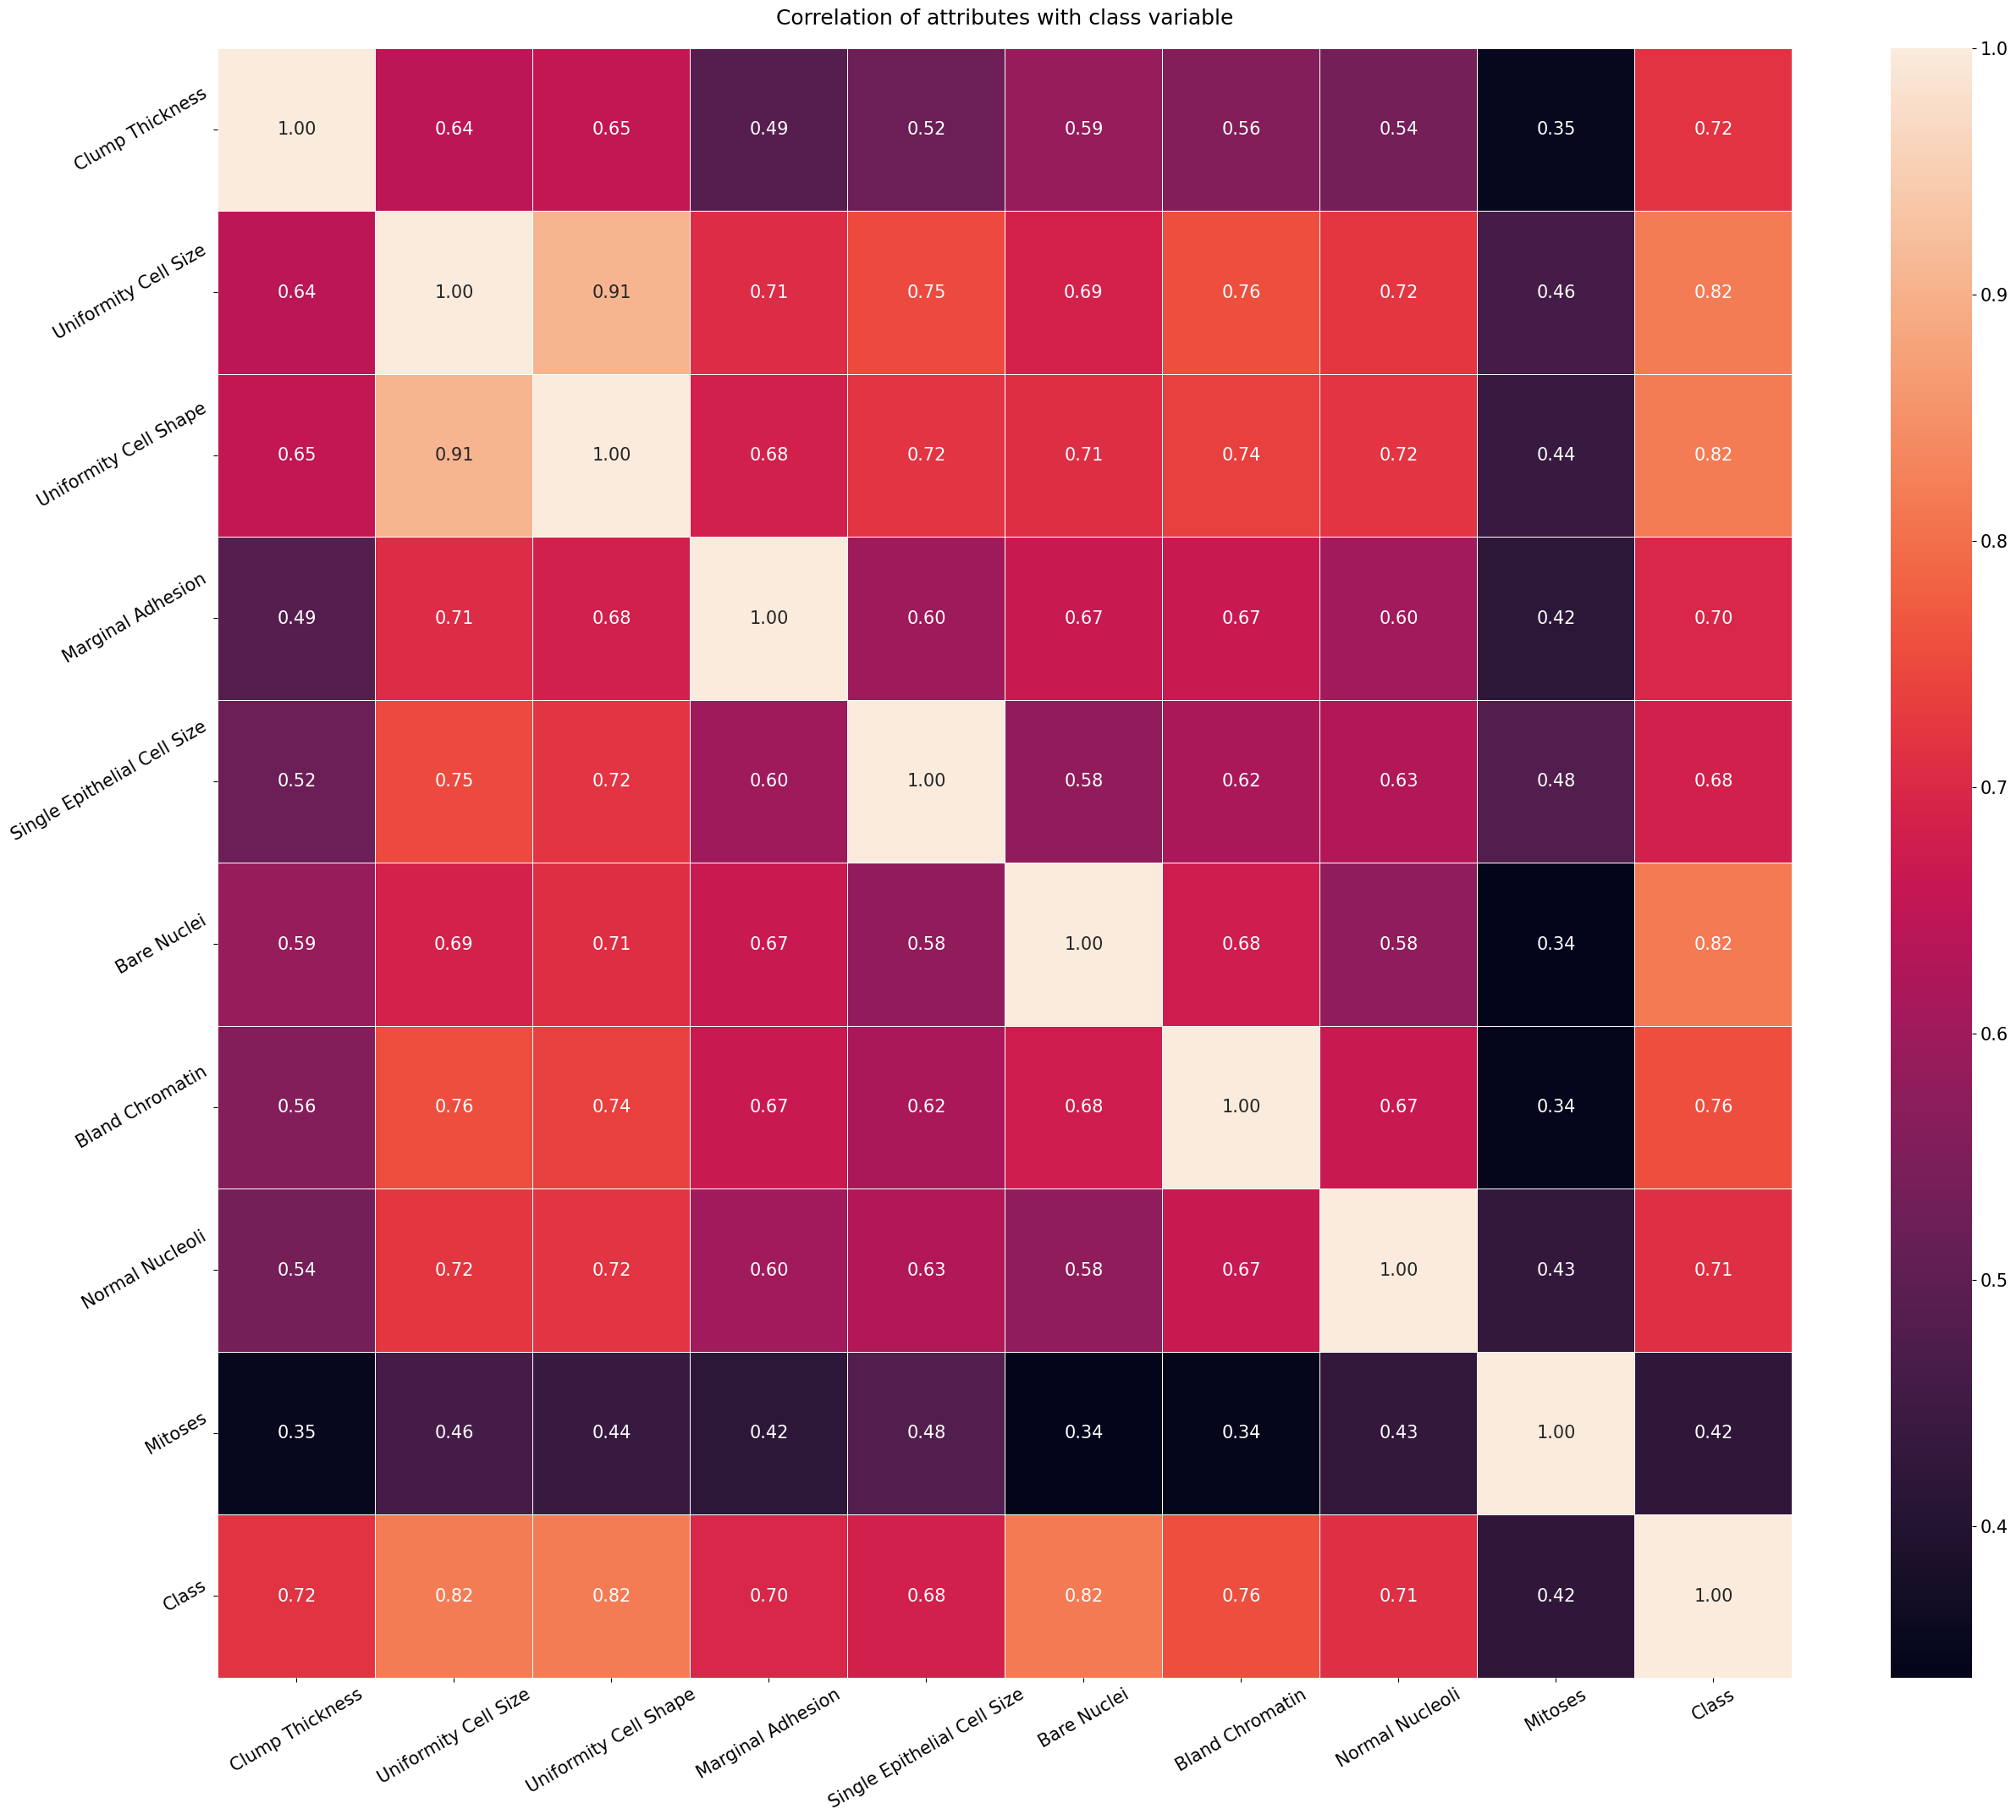

In [68]:
corr = data.corr()
plt.title("Correlation of attributes with class variable",pad=20)
a=sns.heatmap(corr,annot=True,fmt='.2f',linewidths=0.5,linecolor='white')
labels = data.columns
a.set_xticklabels(labels,rotation=30)
a.set_yticklabels(labels,rotation=30)
plt.show()

In [69]:
x = data.drop('Class',axis=1)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.fit_transform(x_test)

In [70]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
conf = confusion_matrix(y_test,y_pred)

Text(339.72222222222223, 0.5, 'Actual Label')

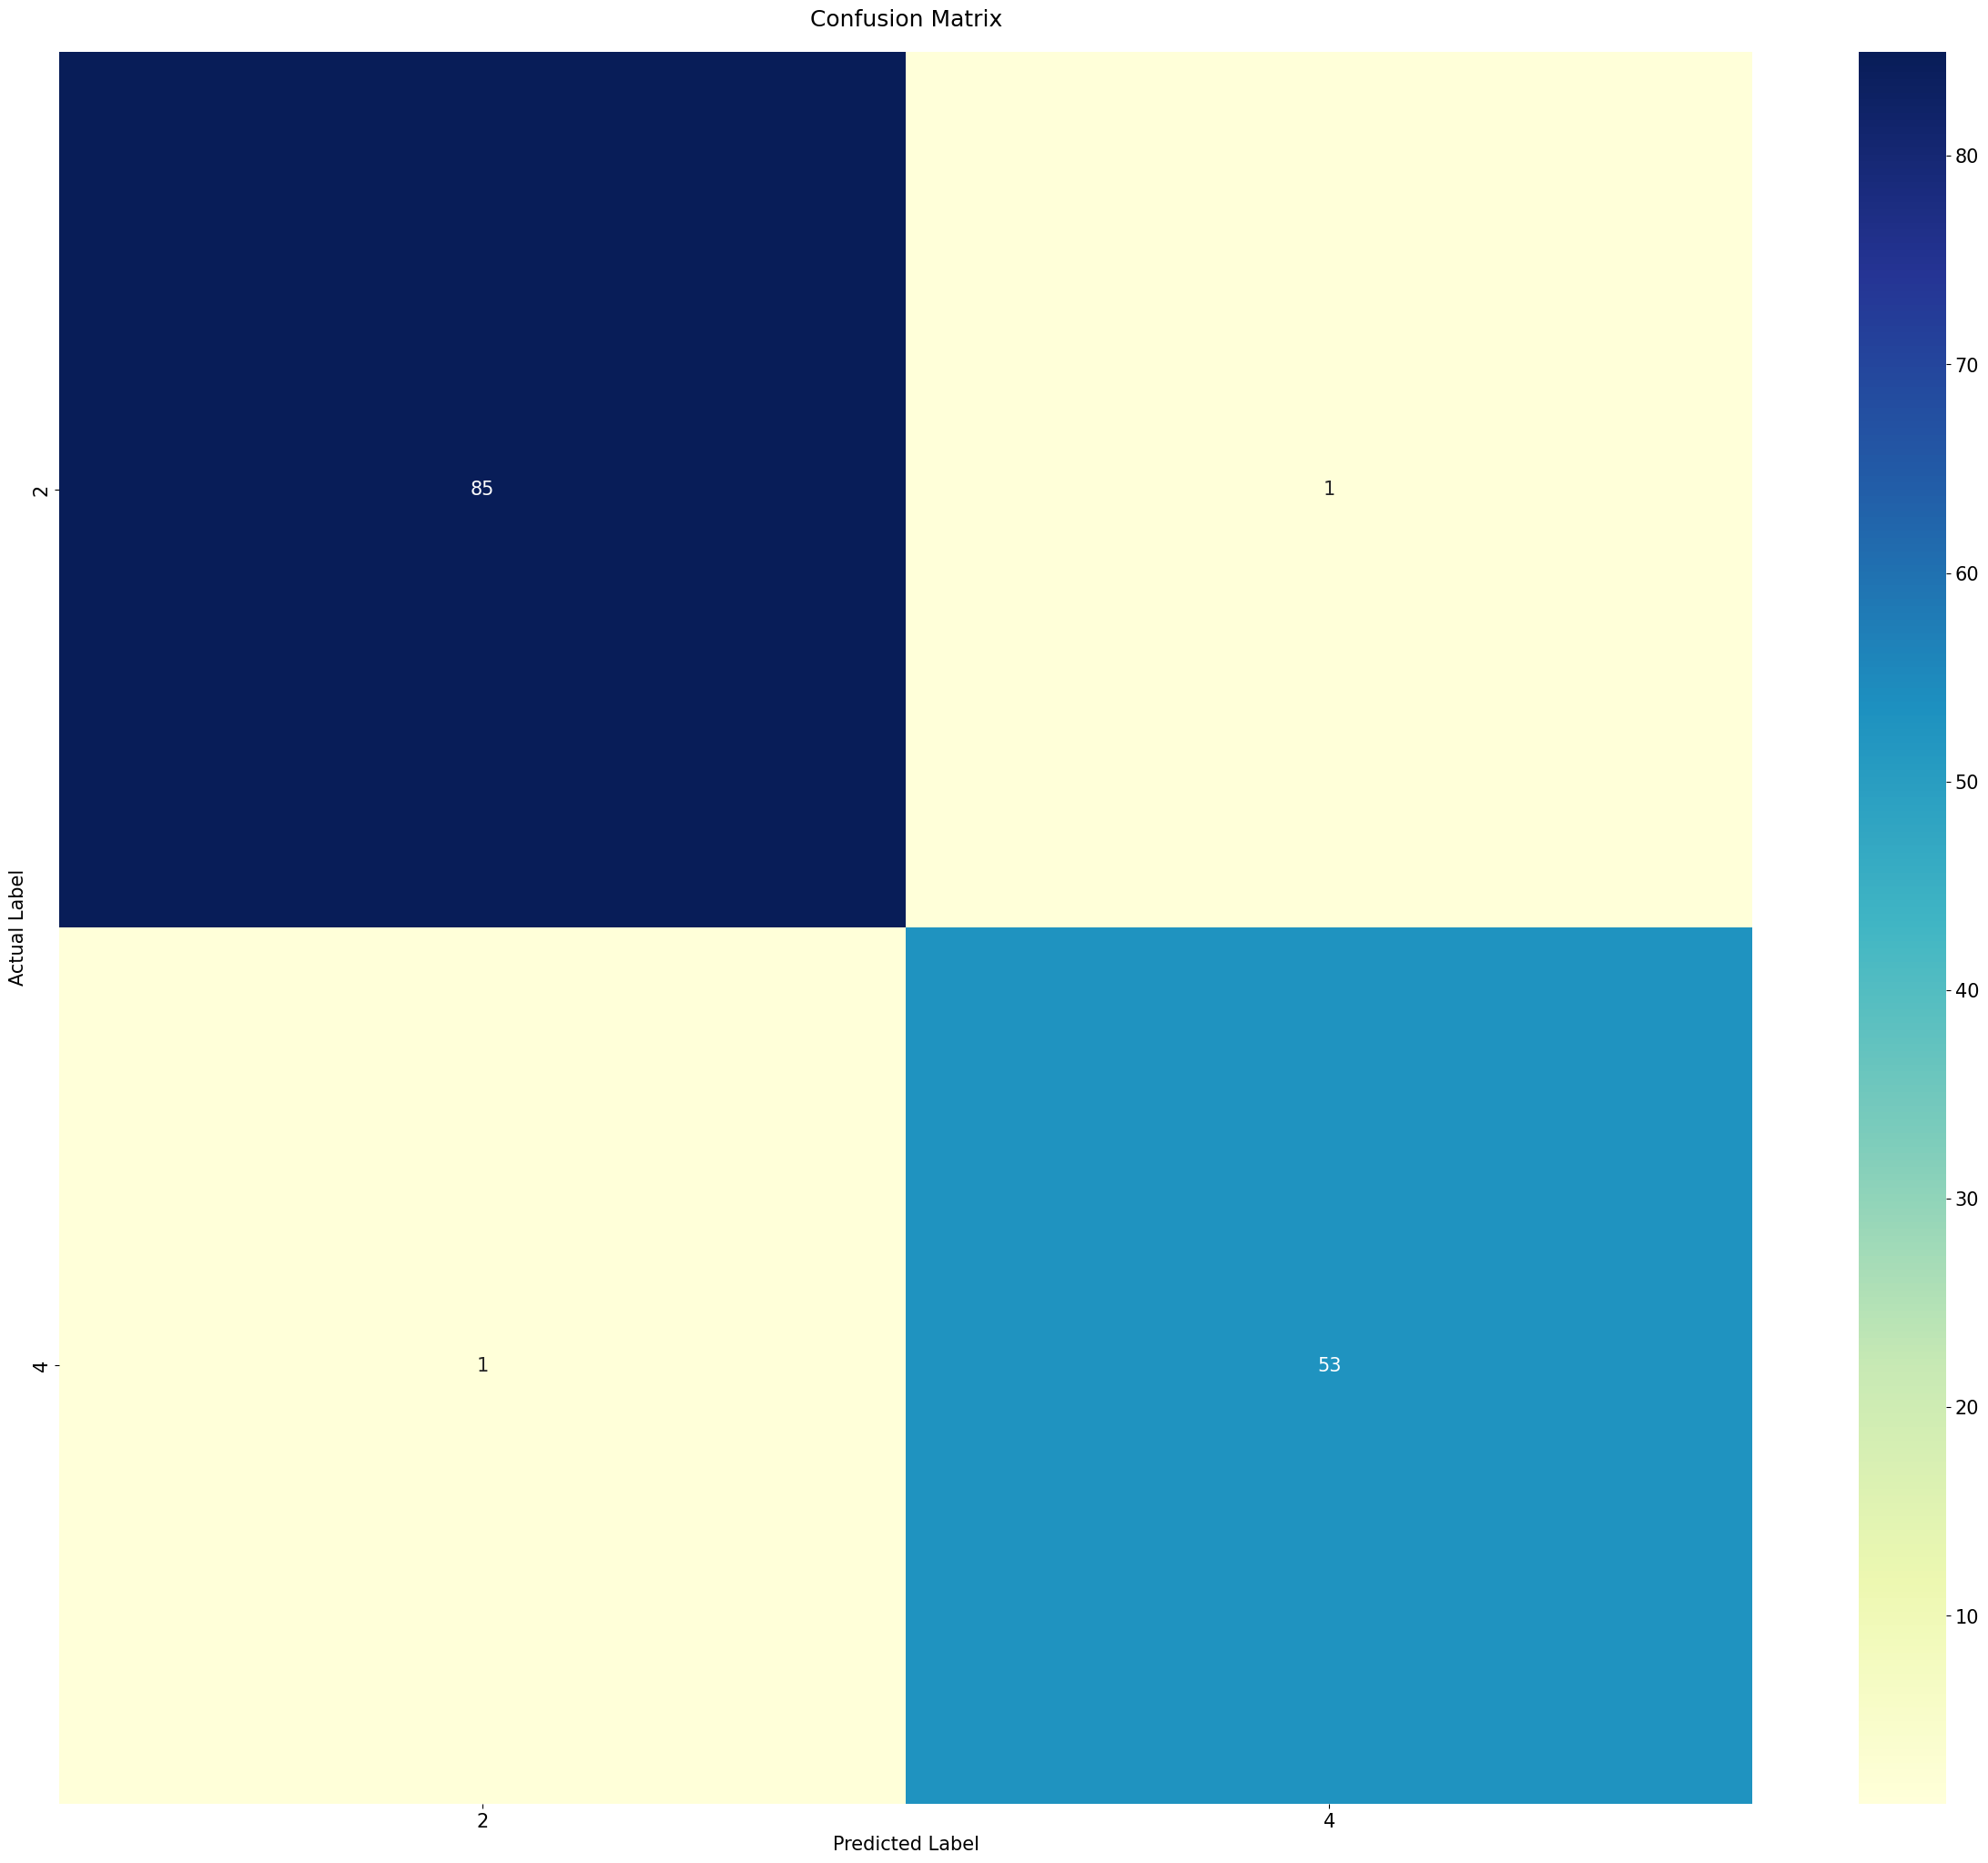

In [71]:
plt.title('Confusion Matrix', pad=20)
conf=sns.heatmap(conf,annot=True,cmap="YlGnBu")
conf.set_xticklabels([2,4])
conf.set_yticklabels([2,4])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [72]:
cnames=['Bengin','Malignant']
print(classification_report(y_test,y_pred,target_names=cnames))

              precision    recall  f1-score   support

      Bengin       0.99      0.99      0.99        86
   Malignant       0.98      0.98      0.98        54

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

